# Robotic Systems

$\newcommand{\mb}[1]{\mathbf{ #1 }}$
$\newcommand{\bb}[1]{\mathbb{ #1 }}$
$\newcommand{\bs}[1]{\boldsymbol{ #1 }}$
$\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}$
$\newcommand{\ip}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\der}[2]{\frac{\mathrm{d} #1 }{\mathrm{d} #2 }}$
$\newcommand{\derp}[2]{\frac{\partial #1 }{\partial #2 }}$

$\newcommand{\R}{\bb{R}}$

## Dynamics

Let $\mathcal{Q} \subseteq \R^n$ be a configuration space. Let $T: \mathcal{Q} \times \R^n \to \R_+$ and $U: \mathcal{Q} \to \R$ denote the kinetic and potential energies of the system, respectively. 

The kinetic energy satisfies:

\begin{equation}
    T(\mb{q}, \dot{\mb{q}}) = \frac{1}{2}\dot{\mb{q}}^\top\mb{D}(\mb{q})\dot{\mb{q}},
\end{equation}

for all coordinates $\mb{q} \in \mathcal{Q}$ and coordinate rates $\dot{\mb{q}} \in \R^n$, with inertia matrix function $\mb{D}: \mathcal{Q} \to \bb{S}^n_{++}$. Here, $\bb{S}^n_{++}$ denotes the set of positive definite $n \times n$ symmetric matrices. 

Let $\mathcal{L}: \mathcal{Q} \times \R^n \to \R$ denote the system Lagrangian, defined as $\mathcal{L}(\mb{q}, \dot{\mb{q}}) = T(\mb{q}, \dot{\mb{q}}) - U(\mb{q})$ for all $\mb{q} \in \mathcal{Q}$ and $\dot{\mb{q}} \in \R^n$. 

The system Lagrangian and actions are related via the Euler-Lagrange equation:

\begin{equation}
    \der{}{t}\left( \derp{\mathcal{L}}{\dot{\mb{q}}} \right)^\top + \left(\derp{\mathcal{L}}{\mb{q}}\right)^\top = \mb{B}\mb{u},
\end{equation}

for all $\mb{q} \in \mathcal{Q}$, $\dot{\mb{q}} \in \R^n$, and actions $\mb{u} \in \mathcal{U}$, with full-rank static actuation matrix $\mb{B} \in \mathbb{R}^{n \times m}$.

To obtain the equations of motion of the system, we expand the terms in the Euler-Lagrange equation as:

\begin{equation}
    \der{}{t}\left(\derp{T}{\dot{\mb{q}}}\right)^\top - \left(\derp{T}{\mb{q}}\right)^\top + \left(\derp{U}{\mb{q}}\right)^\top = \der{}{t} (\mb{D}(\mb{q})\dot{\mb{q}}) - \frac{1}{2}\derp{\mb{D}}{\mb{q}}(\dot{\mb{q}}, \dot{\mb{q}}, \cdot) + \left(\derp{U}{\mb{q}}\right)^\top.
\end{equation}

Here, $\derp{\mb{D}}{\mb{q}}: \mathcal{Q} \to \R^{n \times n \times n}$ is represented as a multilinear operator-valued function, with:

\begin{equation}
    \derp{\mb{D}}{\mb{q}}(\mb{e}_i, \mb{e}_j, \mb{e}_k) = \derp{D_{ij}(\mb{q})}{q_k},
\end{equation}

for all $\mb{q} \in \mathcal{Q}$ and $i, j, k \in \{1, \dots, n\}$. Here, $\mb{e}_i, \mb{e}_j, \mb{e}_k \in \R^n$ denote elementary basis vectors.

$\derp{\mb{D}}{\mb{q}}(\dot{\mb{q}}, \dot{\mb{q}}, \cdot): \mathcal{Q} \to \R^n$ denotes a tensor contraction in the first two arguments.

Further expansion yields:

\begin{equation}
    \mb{D}(\mb{q})\ddot{\mb{q}} + \underbrace{\derp{\mb{D}}{\mb{q}}(\cdot, \dot{\mb{q}}, \dot{\mb{q}}) - \frac{1}{2}\derp{\mb{D}}{\mb{q}}(\dot{\mb{q}}, \dot{\mb{q}}, \cdot)}_{\mb{C}(\mb{q}, \dot{\mb{q}})\dot{\mb{q}}} + \underbrace{\left(\derp{U}{\mb{q}}\right)^\top}_{\mb{G}(\mb{q})} = \mb{B}\mb{u},
\end{equation}

with Coriolis terms $\mb{C}: \mathcal{Q} \times \R^n \to \R^{n \times n}$ and potential (typically gravity) terms $\mb{G}: \mathcal{Q} \to \R^n$.

The Coriolis terms come from:

\begin{align}
    \derp{\mb{D}}{\mb{q}}(\cdot, \dot{\mb{q}}, \dot{\mb{q}}) - \frac{1}{2}\derp{\mb{D}}{\mb{q}}(\dot{\mb{q}}, \dot{\mb{q}}, \cdot) &= \derp{\mb{D}}{\mb{q}}(\cdot, \dot{\mb{q}}, \cdot)\dot{\mb{q}} - \frac{1}{2} \left( \dot{\mb{q}}^\top \derp{\mb{D}}{\mb{q}}(\cdot, \dot{\mb{q}}, \cdot) \right)^\top\\
    &= \underbrace{\left( \derp{\mb{D}}{\mb{q}}(\cdot, \dot{\mb{q}}, \cdot) - \frac{1}{2} \left( \derp{\mb{D}}{\mb{q}}(\cdot, \dot{\mb{q}}, \cdot) \right)^\top \right)}_{\mb{C}(\mb{q}, \dot{\mb{q}})} \dot{\mb{q}}
\end{align}

The equations of motion can be expressed as:

\begin{equation}
    \mb{D}(\mb{q})\ddot{\mb{q}} + \underbrace{\mb{C}(\mb{q}, \dot{\mb{q}})\dot{\mb{q}} + \mb{G}(\mb{q})}_{\mb{H}(\mb{q}, \dot{\mb{q}})} = \mb{B}\mb{u},
\end{equation}

with nonlinear terms $\mb{H}: \mathcal{Q} \times \R^n \to \R^n$.

Alternatively, the equations can be expressed as an system of first-order equations:

\begin{equation}
    \der{}{t} \begin{bmatrix} \mb{q} \\ \dot{\mb{q}} \end{bmatrix} = \begin{bmatrix} \dot{\mb{q}} \\ -\mb{D}(\mb{q})^{-1}\mb{H}(\mb{q}, \dot{\mb{q}}) \end{bmatrix} + \begin{bmatrix} \mb{0}_{n \times m} \\ \mb{D}(\mb{q})^{-1}\mb{B} \end{bmatrix}\mb{u},
\end{equation}

with dynamics affine in the action.

## Control: Full Actuation

Assume $m = n$, in which case $\mb{B}$ is invertible. Suppose we want to drive the system to a desired configuration $\mb{q}_d \in \mathcal{Q}$ (trajectory tracking strategies more closely resemble strategies for underactuated systems). We have a number of nonlinear control techniques to employ.

We can induce linear dynamics with linearizing feedback, and then apply linear control techniques to stabilize the resulting system.

We can specify an energy-based Lyapunov function and generate an associated asymptotically-stabilizing controller.

Finally, we can specify a Lyapunov function through feedback linearization and generate an optimization-based exponentially-stabilizing controller.

## Example: Inverted Pendulum

Consider a frictionless inverted pendulum, modeled as a massless rod of length $l$ with torque input $\tau$ at a fixed base and point mass $m$ at the opposite end of the rod. 

Consider inertial reference frame $\mathcal{I} = (\mb{i}_1, \mb{i}_2, \mb{i}_3)$ and body reference frame $\mathcal{B} = (\mb{b}_1, \mb{b}_2, \mb{b}_3)$, with $\mb{b}_3 = \mb{i}_3$.

Let $\mb{f}^{\mathcal{I}} = -mg \mb{e}_1$ denote the gravitational force resolved in the inertial frame and let $\mb{r}^\mathcal{B} = l \mb{e}_1$ denote the position of the mass relative to the base resolved in the body frame. Here $\mb{e}_1$ denotes the first elementary basis vector.

Suppose the angle from upright $\theta$ is measured along with the corresponding angular rate $\dot{\theta}$.

The direction cosine matrix (DCM) relating body frame coordinates to inertial frame coordinates is:

\begin{equation}
    \mb{C}^{\mathcal{B}\mathcal{I}} = \begin{bmatrix} \ip{\mb{b}_1}{\mb{i}_1} & \ip{\mb{b}_1}{\mb{i}_2} & \ip{\mb{b}_1}{\mb{i}_3} \\
    \ip{\mb{b}_2}{\mb{i}_1} & \ip{\mb{b}_2}{\mb{i}_2} & \ip{\mb{b}_2}{\mb{i}_3} \\ 
    \ip{\mb{b}_3}{\mb{i}_1} & \ip{\mb{b}_3}{\mb{i}_2} & \ip{\mb{b}_3}{\mb{i}_3} \end{bmatrix} = \underbrace{\begin{bmatrix} \cos{\theta} & \sin{\theta} & 0 \\ -\sin{\theta} & \cos{\theta} & 0 \\ 0 & 0 & 1
    \end{bmatrix}}_{\mb{R}(\theta)^\top},
\end{equation}

noting that $\cos{\left( \frac{\pi}{2} - \theta \right)} = \sin{\theta}$.

Because $\mb{C}^{\mathcal{B}\mathcal{I}}$ is orthogonal, $\mb{C}^{\mathcal{I}\mathcal{B}} = \left( \mb{C}^{\mathcal{B}\mathcal{I}} \right)^{-1} = \left( \mb{C}^{\mathcal{B}\mathcal{I}} \right)^\top$.

The position of the mass relative to the base is resolved in the inertial frame as:

\begin{align}
    \mb{r}^{\mathcal{I}} &= \mb{C}^{\mathcal{I}\mathcal{B}}\mb{r}^\mathcal{B}\\
    &= l \mb{R}(\theta)\mb{e}_1.
\end{align}

The corresponding velocity is resolved in the inertial frame as:

\begin{equation}
    \dot{\mb{r}}^{\mathcal{I}} = l \dot{\theta} \der{\mb{R}}{\theta} \mb{e}_1.
\end{equation}

Here:

\begin{equation}
    \der{\mb{R}}{\theta} = \begin{bmatrix} -\sin{\theta} & \cos{\theta} & 0 \\ -\cos{\theta} & -\sin{\theta} & 0 \\ 0 & 0 & 0 \end{bmatrix}.
\end{equation}

Finally, the associated kinetic energy is:

\begin{align}
    T(\theta, \dot{\theta}) &= \frac{1}{2}m \norm{\dot{\mb{r}}^\mathcal{I}}_2^2\\
    &= \frac{1}{2} ml^2 \dot{\theta}^2 (\sin^2{\theta} + \cos^2{\theta})\\
    &= \frac{1}{2} ml^2 \dot{\theta}^2.
\end{align}

The kinetic energy can be expressed as:

\begin{equation}
    T(\theta, \dot{\theta}) = \frac{1}{2} D \dot{\theta}^2,
\end{equation}

for static inertia $D = ml^2$.

Since the inertia is not a function of the angle $\theta$, there are no Coriolis terms and $C = 0$.

On the other hand, the potential energy of the system is:

\begin{align}
    U(\theta) &= -\left(\mb{f}^\mathcal{I}\right)^\top \mb{r}^{\mathcal{I}}\\
    &= mgl \mb{e}_1^\top \mb{R}(\theta) \mb{e}_1\\
    &= mgl \cos{\theta}.
\end{align}

This yields:

\begin{equation}
    G(\theta) = \der{U}{\theta} = -mgl\sin{\theta}.
\end{equation}

The system Lagrangian is therefore:

\begin{align}
    \mathcal{L}(\theta, \dot{\theta}) &= T(\theta, \dot{\theta}) - U(\theta)\\
    &= \frac{1}{2}ml\dot{\theta}^2 - mgl\cos{\theta}.
\end{align}

The equations of motion are:

\begin{equation}
    D\ddot{\theta} + G(\theta) = ml^2 \ddot{\theta} - mgl\sin{\theta} = \tau,
\end{equation}

assuming the static actuation is identity.

In first order form, the equations of motion are expressed as:

\begin{equation}
    \der{}{t} \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix} = \begin{bmatrix} \dot{\theta} \\ \frac{g}{l}\sin{\theta} \end{bmatrix} + \begin{bmatrix} 0 \\ \frac{1}{ml^2} \end{bmatrix} \tau.
\end{equation}

In [1]:
from numpy import array, cos, sin

from dynamics import RoboticDynamics, SystemDynamics

class InvertedPendulum(SystemDynamics, RoboticDynamics):
    def __init__(self, m, l, g=9.81):
        SystemDynamics.__init__(self, 2, 1)
        RoboticDynamics.__init__(self, array([[1]]))
        self.params = m, l, g
        
    def D(self, q):
        m, l, _ = self.params
        return array([[m * (l ** 2)]])
    
    def C(self, q, q_dot):
        return array([[0]])
    
    def U(self, q):
        m, l, g = self.params
        theta, = q
        return m * g * l * cos(theta)
    
    def G(self, q):
        m, l, g = self.params
        theta, = q
        return array([-m * g * l * sin(theta)])

We can create an inverted pendulum system with a mass of $0.25$ kg and a length of $0.5$ m.

In [2]:
m, l = 0.25, 0.5
ip = InvertedPendulum(m, l)

## Feedback Linearization

Let $\bs{\nu}$ denote an auxilliary action to be specified later. Consider the controller:

\begin{align}
    \mb{u} &= (\mb{D}(\mb{q})^{-1}\mb{B})^{-1}(\mb{D}(\mb{q})^{-1}\mb{H}(\mb{q}, \dot{\mb{q}}) + \bs{\nu})\\
    &= \mb{B}^{-1}(\mb{H}(\mb{q}, \dot{\mb{q}}) + \mb{D}(\mb{q})\bs{\nu}).
\end{align}

This controller induces dynamics:

\begin{equation}
    \mb{D}(\mb{q})\ddot{\mb{q}} = \mb{D}(\mb{q})\bs{\nu}.
\end{equation}

Alternatively, the induced dynamics can be represented as:

\begin{equation}
    \underbrace{\der{}{t}\begin{bmatrix} \mb{q} - \mb{q}_d \\ \dot{\mb{q}} \end{bmatrix}}_{\dot{\mb{x}}} = \begin{bmatrix} \dot{\mb{q}} \\ \bs{\nu} \end{bmatrix} = \underbrace{\begin{bmatrix} \mb{0}_{n \times n} & \mb{I}_n \\ \mb{0}_{n \times n} & \mb{0}_{n \times n} \end{bmatrix}}_{\mb{F}} \underbrace{\begin{bmatrix} \mb{q} - \mb{q}_d \\ \dot{\mb{q}} \end{bmatrix}}_{\mb{x}} + \underbrace{\begin{bmatrix} \mb{0}_{n \times m} \\ \mb{I}_m \end{bmatrix}}_{\mb{G}} \bs{\nu},
\end{equation}

which are controllable double integrator dynamics.

We can now choose any linear controller to stabilize the induced dynamics. For example, we can choose the controller minimizing the infinite-horizon Linear Quadratic Regulator cost:

\begin{equation}
    \int_{t_0}^{\infty} \frac{1}{2}\left(\mb{x}(t)^\top\mb{Q}\mb{x}(t) + \bs{\nu}(t)^\top\mb{R}\bs{\nu}(t) \right)\mathrm{d}t,
\end{equation}

for cost matrices $\mb{Q} \in \bb{S}^{2n}_{++}$ and $\mb{R} \in \bb{S}^m_{++}$, and initial time $t_0$.

The minimizing auxilliary controller is:

\begin{equation}
    \bs{\nu}^* = -\underbrace{\frac{1}{2}\mb{R}^{-1}\mb{G}^\top\mb{P}}_{\mb{K}}\mb{x}.
\end{equation}

with $\mb{P} \in \bb{S}^{2n}_{++}$ solving the continuous-time algebraic Riccati equation (CARE):

\begin{equation}
    \mb{F}^\top\mb{P} + \mb{P}\mb{F} - \mb{P}\mb{G}\mb{R}^{-1}\mb{G}^\top\mb{P} = -\mb{Q}.
\end{equation}

Importantly, this controller need not be optimal in terms of the cost of actions $\mb{u}$.

Let's create a linearizing feedback controller for the inverted pendulum with $Q = 10 \cdot \mb{I}_2$ and $R = 1$.

In [3]:
from matplotlib.pyplot import figure, grid, legend, plot, show, subplot, xlabel, ylabel
from numpy import identity, linspace
from controllers import FBLinController, LQRController

Q, R = 10 * identity(2), identity(1)
lqr = LQRController.build(ip, Q, R)
fb_lin = FBLinController(ip, lqr)

We simulate the system for $10$ seconds with control frequency of $100$ Hz from initial conditions $\theta = 1$ rad and $\dot{\theta} = 0$ rad/sec.

In [4]:
x_0 = array([1, 0])
ts = linspace(0, 10, 1000 + 1)
fb_lin_data = ip.simulate(x_0, fb_lin, ts)

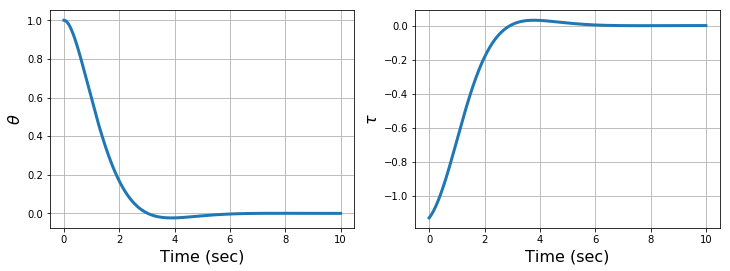

In [5]:
xs, us = fb_lin_data

figure(figsize=(12, 4))

subplot(121)
plot(ts, xs[:, 0], linewidth=3)
grid()
xlabel('Time (sec)', fontsize=16)
ylabel('$\\theta$', fontsize=16)

subplot(122)
plot(ts[:-1], us, linewidth=3)
grid()
xlabel('Time (sec)', fontsize=16)
ylabel('$\\tau$', fontsize=16)

show()

## Energy-Based Lyapunov Functions

From the Euler-Lagrange equation, the time-derivative of kinetic energy satisfies:

\begin{align}
    \dot{T}(\mb{q}, \dot{\mb{q}}, \mb{u}) &= \derp{T}{\mb{q}}\dot{\mb{q}} + \derp{T}{\dot{\mb{q}}}\ddot{\mb{q}}\\
    &= \left(\der{}{t}\left(\derp{T}{\dot{\mb{q}}}\right) + \derp{U}{\mb{q}} - (\mb{B}\mb{u})^\top \right)\dot{\mb{q}} + \derp{T}{\dot{\mb{q}}}\ddot{\mb{q}}
\end{align}

Rearranging terms, we obtain:

\begin{align}
    \dot{T}(\mb{q}, \dot{\mb{q}}, \mb{u}) &= \left(\der{}{t}\left(\derp{T}{\dot{\mb{q}}}\right)\dot{\mb{q}} + \derp{T}{\dot{\mb{q}}}\ddot{\mb{q}}\right) + \dot{U}(\mb{q}, \dot{\mb{q}}) - \dot{\mb{q}}^\top\mb{B}\mb{u}\\
    &= \der{}{t}\left( \derp{T}{\dot{\mb{q}}}\dot{\mb{q}} \right) + \dot{U}(\mb{q}, \dot{\mb{q}}) - \dot{\mb{q}}^\top\mb{B}\mb{u} 
\end{align}

Note that:

\begin{align}
    \der{}{t}\left( \derp{T}{\dot{\mb{q}}}\dot{\mb{q}} \right) = \der{}{t} \left( \dot{\mb{q}}^\top\mb{D}(\mb{q})\dot{\mb{q}} \right) = 2\dot{T}(\mb{q}, \dot{\mb{q}}, \mb{u}).
\end{align}

Therefore, we have:

\begin{equation}
    \dot{T}(\mb{q}, \dot{\mb{q}}, \mb{u}) + \dot{U}(\mb{q}, \dot{\mb{q}}) = \dot{\mb{q}}^\top\mb{B}\mb{u}.
\end{equation}

Defining total energy $E: \mathcal{Q} \times \R^n \to \R$ as $E(\mb{q}, \dot{\mb{q}}) = T(\mb{q}, \dot{\mb{q}}) + U(\mb{q})$ for all $\mb{q} \in \mathcal{Q}$ and $\dot{\mb{q}} \in \R^n$ yields:

\begin{equation}
    \dot{E}(\mb{q}, \dot{\mb{q}}, \mb{u}) = \dot{\mb{q}}^\top\mb{B}\mb{u}.
\end{equation}

With no control, energy is conserved and the system evolves along the level sets of $E$.

We'll use the energy of the system to motivate a Lyapunov function. Let $V: \mathcal{Q} \times \R^n \to \R_+$ be defined as:

\begin{equation}
    V(\mb{q}, \dot{\mb{q}}) = T(\mb{q}, \dot{\mb{q}}) + \frac{1}{2}(\mb{q} - \mb{q}_d)^\top\mb{K}_P(\mb{q} - \mb{q}_d),
\end{equation}

for all $\mb{q} \in \mathcal{Q}$ and $\dot{\mb{q}} \in \R^n$, with proportional gain $\mb{K}_P \in \bb{S}^n_{++}$.

Note that $V(\mb{q}, \dot{\mb{q}}) = 0$ if only if $\mb{q} = \mb{q}_d$ and $\dot{\mb{q}} = \mb{0}_n$. We will design a controller such that this set point is asymptotically stable.

The time-derivative of $V$ satisfies:

\begin{align}
    \dot{V}(\mb{q}, \dot{\mb{q}}, \mb{u}) &= \dot{T}(\mb{q}, \dot{\mb{q}}, \mb{u}) + (\mb{q} - \mb{q}_d)^\top\mb{K}_P\dot{\mb{q}}\\
    &= \dot{\mb{q}}^\top\mb{B}\mb{u} -\dot{U}(\mb{q}, \dot{\mb{q}}) + (\mb{q} - \mb{q}_d)^\top\mb{K}_P\dot{\mb{q}}\\
    &= \dot{\mb{q}}^\top\left( \mb{B}\mb{u} - \left(\derp{U}{\mb{q}}\right)^\top + \mb{K}_P(\mb{q} - \dot{\mb{q}}) \right).
\end{align}

Recall that:

\begin{equation}
    \left(\derp{U}{\mb{q}}\right)^\top = \mb{G}(\mb{q}).
\end{equation}

Therefore, we can choose the controller:

\begin{equation}
    \mb{u} = \mb{B}^{-1}(\mb{G}(\mb{q}) - \mb{K}_P(\mb{q} - \mb{q}_d) - \mb{K}_D\dot{\mb{q}}),
\end{equation}

with derivative gain $\mb{K}_D \in \bb{S}^n_{++}$.

Using this controller yields:

\begin{equation}
    \dot{V}(\mb{q}, \dot{\mb{q}}, \mb{u}) = -\dot{\mb{q}}^\top\mb{K}_D\dot{\mb{q}},
\end{equation}

which is negative for all $\mb{q} \in \mathcal{Q}$ and $\dot{\mb{q}} \in \R^n \setminus \{ \mb{0}_n \}$.

When $\dot{\mb{q}} = \mb{0}_n$, the equations of motion yield:

\begin{equation}
    \mb{D}(\mb{q})\ddot{\mb{q}} + \mb{G}(\mb{q}) = \mb{B}\mb{B}^{-1}(\mb{G}(\mb{q}) - \mb{K}_P(\mb{q} - \mb{q}_d)),
\end{equation}

or:

\begin{equation}
    \ddot{\mb{q}} = -\mb{D}(\mb{q})^{-1}\mb{K}_P(\mb{q} - \mb{q}_d).
\end{equation}

This means the only invariant set with $\dot{\mb{q}} = \mb{0}_n$ uniformly is $\{ (\mb{q}_d, \mb{0}_n) \}$, and by LaSalle's invariance principle the set point is asymptotically stable.

Let's create an energy-based controller for the inverted pendulum with $K_P = 1$ and $K_D = 1$ to track an upright angle.

In [6]:
from controllers import EnergyController

K_p, K_d = identity(1), identity(1)
energy = EnergyController(ip, K_p, K_d)

In [7]:
energy_data = ip.simulate(x_0, energy, ts)

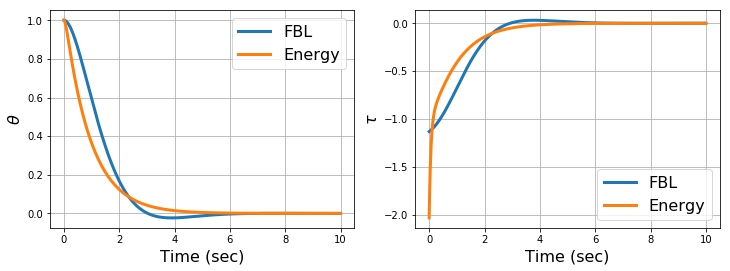

In [8]:
figure(figsize=(12, 4))

subplot(121)
xs, _ = fb_lin_data; plot(ts, xs[:, 0], linewidth=3, label='FBL')
xs, _ = energy_data; plot(ts, xs[:, 0], linewidth=3, label='Energy')
grid(); legend(fontsize=16)
xlabel('Time (sec)', fontsize=16); ylabel('$\\theta$', fontsize=16)

subplot(122)
_, us = fb_lin_data; plot(ts[:-1], us, linewidth=3, label='FBL')
_, us = energy_data; plot(ts[:-1], us, linewidth=3, label='Energy')
grid(); legend(fontsize=16)
xlabel('Time (sec)', fontsize=16); ylabel('$\\tau$', fontsize=16)

show()

## Feeback Linearization-Based Lyapunov Functions

Recall that feedback linearization induced controllable linear dynamics:

\begin{equation}
    \dot{\mb{x}} = \mb{F}\mb{x} + \mb{G}\bs{\nu}.
\end{equation}

Additionally, solving the CARE gave a matrix $\mb{P} \in \bb{S}^{2n}_{++}$ satisfying:

\begin{equation}
    \mb{F}^\top\mb{P} + \mb{P}\mb{F} - \mb{P}\mb{G}\mb{R}^{-1}\mb{G}^\top\mb{P} = -\mb{Q},
\end{equation}

for $\mb{Q} \in \bb{S}^{2n}_{++}$ and $\mb{R} \in \bb{S}^m_{++}$.

Let $V: \R^{2n} \to \R_+$ be defined as $V(\mb{x}) = \mb{x}^\top\mb{P}\mb{x}$ for all $\mb{x} \in \R^{2n}$ and note that:

\begin{equation}
    \lambda_{2n}(\mb{P}) \norm{\mb{x}}_2^2 \leq V(\mb{x}) \leq \lambda_1(\mb{P}) \norm{\mb{x}}_2^2,
\end{equation}

with $\lambda_1(\cdot)$ and $\lambda_{2n}(\cdot)$ denoting maximum and minimum eigenvalues, respectively.

Let $\mb{u}_{LF}(\bs{\nu})$ denote the linearizing feedback controller with auxilliary control $\bs{\nu}$. The time-derivative of $V$ satisfies:

\begin{align}
    \dot{V}(\mb{x}, \mb{u}_{LF}(\bs{\nu})) &= \dot{\mb{x}}^\top\mb{P}\mb{x} + \mb{x}^\top\mb{P}\dot{\mb{x}}\\
    &= \mb{x}^\top(\mb{F}^\top\mb{P} + \mb{P}\mb{F})\mb{x} + 2\mb{x}^\top\mb{P}\mb{G}\bs{\nu}.
\end{align}

Since $\mb{P}$, $\mb{Q}$, and $\mb{R}$ solve CARE, we obtain:

\begin{equation}
    \dot{V}(\mb{x}, \mb{u}_{LF}(\bs{\nu})) = -\mb{x}^\top\mb{Q}\mb{x} + \mb{x}^\top\mb{P}\mb{G}\mb{R}^{-1}\mb{G}^\top\mb{P}\mb{x} + 2\mb{x}^\top\mb{P}\mb{G}\bs{\nu}.
\end{equation}

Therefore we can choose the auxilliary controller:

\begin{equation}
    \bs{\nu}^* = -\frac{1}{2}\mb{R}^{-1}\mb{G}^\top\mb{P}\mb{x},
\end{equation}

the same LQR solution obtained previously.

Using this controller yields:

\begin{equation}
    \dot{V}(\mb{x}, \mb{u}_{LF}(\bs{\nu}^*)) = -\mb{x}^\top\mb{Q}\mb{x},
\end{equation}

which is negative for all $\mb{x} \in \R^{2n} \setminus \{ \mb{0}_{2n} \}$.

This can be bounded further in terms of $\mb{P}$ and $\mb{Q}$ as:

\begin{align}
    \dot{V}(\mb{x}, \mb{u}_{LF}(\bs{\nu}^*)) &\leq -\lambda_{2n}(\mb{Q}) \norm{\mb{x}}_2^2\\
    &\leq -\frac{\lambda_{2n}(\mb{Q})}{\lambda_1(\mb{P})} V(\mb{x}),
\end{align}

for all $\mb{x} \in \R^{2n}$.

From the comparison principle, it follows that:

\begin{equation}
    V(\mb{x}(t)) \leq V(\mb{x}(t_0)) \exp{\left( -\frac{\lambda_{2n}(\mb{Q})}{\lambda_1(\mb{P})} (t - t_0) \right)},
\end{equation}

for all $t \geq t_0$ with initial time $t_0$.

Finally, we obtain:

\begin{equation}
    \norm{\mb{x}(t)}_2 \leq \norm{\mb{x}(t_0)}_2 \exp{\left( -\frac{\lambda_{2n}(\mb{Q})}{2\lambda_1(\mb{P})}(t - t_0) \right)},
\end{equation}

showing that the set point $\mb{0}_{2n}$, corresponding to $\mb{q} = \mb{q}_d$ and $\dot{\mb{q}} = \mb{0}_n$, is globally exponentially stable with this controller.

This controller is no different than the controller obtained through feedback linearization with LQR. However, this construction presents a bound that may be employed in provably feasible optimization-based controllers.

Consider the optimization problem:

\begin{align}
    \inf_{\mb{u} \in \R^m} ~&~ \mb{u}^\top\bs{\Lambda}\mb{u}\\
    \mathrm{s.t.} ~&~ \dot{V}(\mb{x}, \mb{u}) \leq -\mb{x}^\top\mb{Q}\mb{x},
\end{align}

for all $\mb{x} \in \R^{2n}$. Here $\bs{\Lambda} \in \bb{S}^m_{++}$.

$\mb{u}_{LF}(\bs{\nu})$ is always a feasible solution for this problem.

To better condition the problem, we can regularize the objective using distance from another controller.

Let $\rho \geq 0$ and, consider the optimization problem:

\begin{align}
    \inf_{\mb{u} \in \R^m} ~&~ \mb{u}^\top\bs{\Lambda}\mb{u} + \rho \norm{ \mb{u} - \mb{u}_0 }_2^2\\
    \mathrm{s.t.} ~&~ \dot{V}(\mb{x}, \mb{u}) \leq -\mb{x}^\top\mb{Q}\mb{x},
\end{align}

for all $\mb{x} \in \R^{2n}$. Here, $\mb{u}_0$ is another controller.

Let's create an optimization-based controller for the inverted pendulum. We'll use the same parameters as we did with the linearizing feedback controller. Additionally, we'll use $\bs{\Lambda} = 1$.

In [9]:
from controllers import QPController

cost_mat = identity(1)
qp = QPController.build_care(ip, Q, R, cost_mat)

In [10]:
qp_data = ip.simulate(x_0, qp, ts)

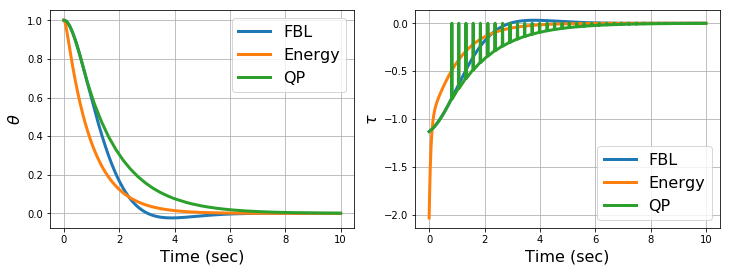

In [11]:
figure(figsize=(12, 4))

subplot(121)
xs, _ = fb_lin_data; plot(ts, xs[:, 0], linewidth=3, label='FBL')
xs, _ = energy_data; plot(ts, xs[:, 0], linewidth=3, label='Energy')
xs, _ = qp_data; plot(ts, xs[:, 0], linewidth=3, label='QP')
grid(); legend(fontsize=16)
xlabel('Time (sec)', fontsize=16); ylabel('$\\theta$', fontsize=16)

subplot(122)
_, us = fb_lin_data; plot(ts[:-1], us, linewidth=3, label='FBL')
_, us = energy_data; plot(ts[:-1], us, linewidth=3, label='Energy')
_, us = qp_data; plot(ts[:-1], us, linewidth=3, label='QP')
grid(); legend(fontsize=16)
xlabel('Time (sec)', fontsize=16); ylabel('$\\tau$', fontsize=16)

show()

Let's compare this to the result with $\rho = 10^3$ and regularization around the linearizing feedback controller.

In [12]:
reg_coeff = 1e3
qp_reg = QPController.build_care(ip, Q, R, cost_mat, reg_coeff, fb_lin)

In [13]:
qp_reg_data = ip.simulate(x_0, qp_reg, ts)

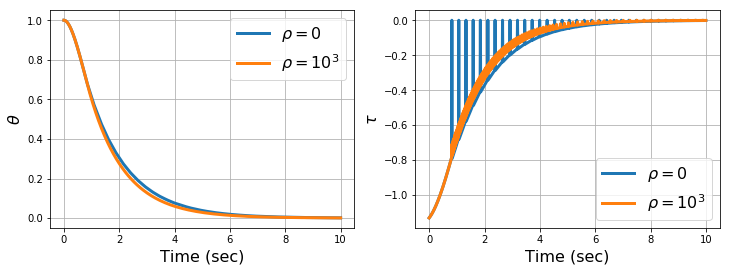

In [14]:
figure(figsize=(12, 4))

subplot(121)
xs, _ = qp_data; plot(ts, xs[:, 0], linewidth=3, label='$\\rho = 0$')
xs, _ = qp_reg_data; plot(ts, xs[:, 0], linewidth=3, label='$\\rho = 10^3$')
grid(); legend(fontsize=16)
xlabel('Time (sec)', fontsize=16); ylabel('$\\theta$', fontsize=16)

subplot(122)
_, us = qp_data; plot(ts[:-1], us, linewidth=3, label='$\\rho = 0$')
_, us = qp_reg_data; plot(ts[:-1], us, linewidth=3, label='$\\rho = 10^3$')
grid(); legend(fontsize=16)
xlabel('Time (sec)', fontsize=16); ylabel('$\\tau$', fontsize=16)

show()